In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster


## Importation des données

In [2]:
caract_circo=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/basefinale.csv",";")
caract_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/caract_deputes.csv",";")
participation_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/projetpython/1. Rassemblement des données/participation.csv",";")
twitter_deputes=pd.read_csv("C:/Users/Paul/Documents/GitHub/proj
                            etpython/1. Rassemblement des données/stats_twitter.csv",";")

C:\Users\Paul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
tab_final=participation_deputes.drop(columns=['DEPSIR','mois','annee']).groupby('nom').sum().reset_index()
tab_final

,nom,amendements_adoptes,amendements_proposes,amendements_signes,commission_interventions,commission_presences,hemicycle_interventions,hemicycle_interventions_courtes,propositions_ecrites,propositions_signees,questions_ecrites,questions_orales,rapports,semaines_presence
0,Adrien Morenas,927,40,2711,100,217,32,14,0,50,66,4,3,111
1,Adrien Quatennens,214,3422,18270,620,172,887,446,2,147,134,31,0,142
2,Agnès Firmin Le Bodo,497,1287,7159,386,332,594,106,8,118,107,29,5,157
3,Agnès Thill,454,1282,4869,134,258,334,273,2,74,137,15,1,153
4,Aina Kuric,698,170,2249,27,152,122,10,1,57,52,5,3,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Éric Diard,108,643,3218,124,187,428,359,10,178,73,13,2,138
558,Éric Girardin,985,137,2674,82,274,61,26,0,55,43,8,2,135
559,Éric Pauget,235,1271,9889,128,218,355,67,31,594,155,14,2,150
560,Éric Poulliat,1146,166,2079,82,222,213,65,0,51,27,5,4,132


In [4]:
tab_final=twitter_deputes.merge(tab_final,on='nom').drop(columns=["Unnamed: 0",'Mot prefere', 'twitter', 'date_scrap'])
tab_final=caract_deputes.merge(tab_final)
tab_final['date_naissance']=pd.to_datetime(tab_final['date_naissance'], format="%Y-%m-%d")
tab_final['mandat_debut']=pd.to_datetime(tab_final['mandat_debut'], format="%Y-%m-%d")
tab_final['mandat_fin']=pd.to_datetime(tab_final['mandat_fin'], format="%Y-%m-%d")
tab_final['age']=[(2022-s.year) for s in tab_final['date_naissance']]
tab_final['duree_mandat (sem)']=[(datetime.now()-s).days/7 for s in tab_final['date_naissance']]
#Certains députés sont en mandat depuis mon longtemps, on veut comparer ce qui est comparable
for name in ['semaines_presence','amendements_adoptes', 'amendements_proposes', 'amendements_signes','commission_interventions', 'commission_presences','hemicycle_interventions', 'hemicycle_interventions_courtes','propositions_ecrites', 'propositions_signees', 'questions_ecrites','questions_orales', 'rapports']:
    new_name=name+"/duree_mandat (sem)"
    tab_final[new_name]=tab_final[name]/tab_final['duree_mandat (sem)']

In [5]:
tab_final.columns

Index(['nom', 'nom_de_famille', 'prenom', 'sexe', 'date_naissance',
       'num_deptmt', 'nom_circo', 'num_circo', 'mandat_debut', 'mandat_fin',
       'ancien_depute', 'groupe_sigle', 'parti_ratt_financier',
       'autres_mandats', 'anciens_autres_mandats', 'nb_mandats', 'twitter',
       'ville_naissance', 'dep_naissance', 'profession', 'cat_soc_pro',
       'patrimoine', 'ancrage_local', 'DEPSIR', 'Tweets', 'Followers',
       'Following', 'Followers ratio', 'Listed', 'Replies/100derniers',
       'Tweets with @mentions/100derniers',
       'Tweets with #hashtags/100derniers', 'Retweets/100',
       'Tweets with links/100derniers', 'Tweets with media/100derniers',
       'amendements_adoptes', 'amendements_proposes', 'amendements_signes',
       'commission_interventions', 'commission_presences',
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports', 'sem

## Méthodes centroïdes

In [6]:
data_kmeans=tab_final.drop(columns=['sexe', 'ancien_depute', 'nb_mandats','ancrage_local','mandat_debut','date_naissance','nom_de_famille', 'prenom','num_deptmt', 'nom_circo', 'num_circo','groupe_sigle', 'parti_ratt_financier','mandat_fin','autres_mandats', 'anciens_autres_mandats','twitter',
       'ville_naissance', 'dep_naissance', 'profession', 'cat_soc_pro', 'patrimoine','DEPSIR','Followers ratio','amendements_adoptes', 'amendements_proposes', 'amendements_signes',
       'commission_interventions', 'commission_presences',
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports', 'semaines_presence','duree_mandat (sem)'])
data_kmeans.set_index("nom",inplace=True)

In [7]:
data_kmeans.columns

Index(['Tweets', 'Followers', 'Following', 'Listed', 'Replies/100derniers',
       'Tweets with @mentions/100derniers',
       'Tweets with #hashtags/100derniers', 'Retweets/100',
       'Tweets with links/100derniers', 'Tweets with media/100derniers', 'age',
       'semaines_presence/duree_mandat (sem)',
       'amendements_adoptes/duree_mandat (sem)',
       'amendements_proposes/duree_mandat (sem)',
       'amendements_signes/duree_mandat (sem)',
       'commission_interventions/duree_mandat (sem)',
       'commission_presences/duree_mandat (sem)',
       'hemicycle_interventions/duree_mandat (sem)',
       'hemicycle_interventions_courtes/duree_mandat (sem)',
       'propositions_ecrites/duree_mandat (sem)',
       'propositions_signees/duree_mandat (sem)',
       'questions_ecrites/duree_mandat (sem)',
       'questions_orales/duree_mandat (sem)', 'rapports/duree_mandat (sem)'],
      dtype='object')

#### Méthode du coude

C:\Users\Paul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


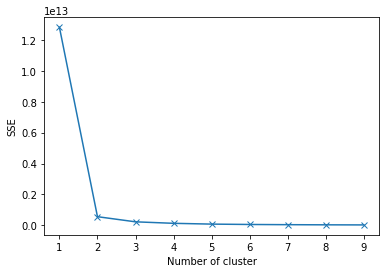

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_kmeans)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='x')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [9]:
#On fait 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(data_kmeans)
data_kmeans['groupe_kmeans']=kmeans.labels_
data_kmeans[data_kmeans['groupe_kmeans']==0].index.to_list()

['Cédric Roussel',
 'Pascale Fontenel-Personne',
 'Guillaume Kasbarian',
 'Cyrille Isaac-Sibille',
 'Guillaume Vuilletet',
 'Olivier Faure',
 'Pierre-Alain Raphan',
 'Emmanuelle Anthoine',
 'Anne-Christine Lang',
 'Laurence Vichnievsky',
 'Barbara Bessot Ballot',
 'Laurent Saint-Martin',
 'Carole Bureau-Bonnard',
 'Annaïg Le Meur',
 'Jean-Paul Lecoq',
 'Bertrand Sorre',
 'Aurore Bergé',
 'Bruno Duvergé',
 'Christian Hutin',
 'Alain Tourret',
 'Paul Molac',
 'Christophe Euzet',
 'Jean-Marc Zulesi',
 'Damien Abad',
 'Fabrice Le Vigoureux',
 'Bertrand Pancher',
 'Anne-Laure Cattelot',
 'Mohamed Laqhila',
 'Loïc Kervran',
 'François-Michel Lambert',
 'Valérie Oppelt',
 'Bruno Questel',
 'Géraldine Bannier',
 'Xavier Breton',
 'Caroline Abadie',
 'Pierre Vatin',
 'Claire Pitollat',
 'Meyer Habib',
 'Philippe Gosselin',
 'Sylvain Waserman',
 'Rodrigue Kokouendo',
 'Cécile Rilhac',
 'Marietta Karamanli',
 'Joël Aviragnet',
 'Vincent Descoeur',
 'Valérie Gomez-Bassac',
 'Christian Jacob',
 'Ph

In [10]:
data_kmeans[data_kmeans['groupe_kmeans']==1].index.to_list()

['Jean-Luc Mélenchon', 'Marine Le Pen']

In [11]:
data_kmeans[data_kmeans['groupe_kmeans']==2].index.to_list()

['Martine Wonner',
 'Mounir Mahjoubi',
 'Éric Ciotti',
 'Jean-Christophe Lagarde',
 'François Ruffin',
 'Nicolas Dupont-Aignan',
 'Alexis Corbière',
 'Clémentine Autain',
 'Adrien Quatennens',
 'Cédric Villani',
 'Christophe Castaner',
 'Richard Ferrand']

## Méthodes hiérarchiques

In [12]:
data_CAH=tab_final.drop(columns=['nom_de_famille', 'prenom','date_naissance',
       'num_deptmt', 'nom_circo', 'num_circo', 'mandat_debut', 'mandat_fin','parti_ratt_financier','autres_mandats', 'anciens_autres_mandats','twitter',
       'ville_naissance', 'dep_naissance','profession','patrimoine','DEPSIR','amendements_adoptes', 'amendements_proposes', 'amendements_signes',
       'commission_interventions', 'commission_presences',
       'hemicycle_interventions', 'hemicycle_interventions_courtes',
       'propositions_ecrites', 'propositions_signees', 'questions_ecrites',
       'questions_orales', 'rapports'])
data_CAH.columns

Index(['nom', 'sexe', 'ancien_depute', 'groupe_sigle', 'nb_mandats',
       'cat_soc_pro', 'ancrage_local', 'Tweets', 'Followers', 'Following',
       'Followers ratio', 'Listed', 'Replies/100derniers',
       'Tweets with @mentions/100derniers',
       'Tweets with #hashtags/100derniers', 'Retweets/100',
       'Tweets with links/100derniers', 'Tweets with media/100derniers',
       'semaines_presence', 'age', 'duree_mandat (sem)',
       'semaines_presence/duree_mandat (sem)',
       'amendements_adoptes/duree_mandat (sem)',
       'amendements_proposes/duree_mandat (sem)',
       'amendements_signes/duree_mandat (sem)',
       'commission_interventions/duree_mandat (sem)',
       'commission_presences/duree_mandat (sem)',
       'hemicycle_interventions/duree_mandat (sem)',
       'hemicycle_interventions_courtes/duree_mandat (sem)',
       'propositions_ecrites/duree_mandat (sem)',
       'propositions_signees/duree_mandat (sem)',
       'questions_ecrites/duree_mandat (sem)',
    

In [13]:
data_CAH

,nom,sexe,ancien_depute,groupe_sigle,nb_mandats,cat_soc_pro,ancrage_local,Tweets,Followers,Following,...,amendements_signes/duree_mandat (sem),commission_interventions/duree_mandat (sem),commission_presences/duree_mandat (sem),hemicycle_interventions/duree_mandat (sem),hemicycle_interventions_courtes/duree_mandat (sem),propositions_ecrites/duree_mandat (sem),propositions_signees/duree_mandat (sem),questions_ecrites/duree_mandat (sem),questions_orales/duree_mandat (sem),rapports/duree_mandat (sem)
0,Cédric Roussel,1,0,LREM,1,Professions libérales et assimilés,0,3681.0,5662.0,1023.0,...,0.901179,0.025692,0.062285,0.041653,0.012846,0.000389,0.022189,0.010511,0.001946,0.000779
1,Pascale Fontenel-Personne,0,0,MODEM,1,Commerçants et assimilés,1,4956.0,4653.0,1215.0,...,1.118547,0.002894,0.027329,0.013825,0.003215,0.000643,0.018005,0.011896,0.003858,0.000000
2,Guillaume Kasbarian,1,0,LREM,1,Cadres d'entreprise,0,6304.0,10539.0,1264.0,...,1.184632,0.108344,0.127593,0.274434,0.100094,0.000000,0.025299,0.008799,0.002750,0.002750
3,Cyrille Isaac-Sibille,1,0,MODEM,1,Professions libérales et assimilés,1,6427.0,2594.0,1287.0,...,1.145148,0.108345,0.075842,0.099617,0.045144,0.001505,0.010534,0.012640,0.004213,0.004213
4,Guillaume Vuilletet,1,0,LREM,1,Cadres d'entreprise,0,3065.0,3773.0,812.0,...,0.742834,0.082225,0.096280,0.099794,0.026003,0.001054,0.017569,0.023192,0.002811,0.005974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Luc Lamirault,1,0,AE,2,Chefs d'entreprise de 10 salariés ou plus,0,0.0,0.0,0.0,...,0.338337,0.000000,0.004820,0.002249,0.000000,0.000000,0.001607,0.001607,0.000321,0.000000
558,Christelle Petex-Levet,0,0,LR,1,NaN,1,0.0,0.0,0.0,...,0.153464,0.000000,0.004636,0.000000,0.000000,0.000000,0.000927,0.000464,0.000000,0.000000
559,Lamia El Aaraje,0,0,SOC,1,Professions libérales et assimilés,0,3589.0,5471.0,1868.0,...,1.023312,0.000000,0.004366,0.000000,0.000000,0.000000,0.000546,0.002729,0.000000,0.000000
560,Sophie Métadier,0,0,UDI,2,Cadres d'entreprise,0,64.0,241.0,188.0,...,0.244102,0.000000,0.005684,0.000000,0.000000,0.000000,0.000947,0.001579,0.000000,0.000316


In [14]:
data_CAH=data_CAH.merge(pd.get_dummies(data_CAH.cat_soc_pro, prefix=''), left_index=True, right_index=True)
data_CAH=data_CAH.merge(pd.get_dummies(data_CAH.groupe_sigle, prefix=''), left_index=True, right_index=True)
data_CAH=data_CAH.drop(columns=['groupe_sigle','cat_soc_pro'])
data_CAH=data_CAH.set_index("nom")
data_CAH

,sexe,ancien_depute,nb_mandats,ancrage_local,Tweets,Followers,Following,Followers ratio,Listed,Replies/100derniers,...,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI
nom,,,,,,,,,,,,,,,,,,,,,
Cédric Roussel,1,0,1,0,3681.0,5662.0,1023.0,5.53,131.0,1.0,...,0,0,0,0,1,0,0,0,0,0
Pascale Fontenel-Personne,0,0,1,1,4956.0,4653.0,1215.0,3.83,82.0,5.0,...,0,0,0,0,0,0,1,0,0,0
Guillaume Kasbarian,1,0,1,0,6304.0,10539.0,1264.0,8.34,178.0,1.0,...,0,0,0,0,1,0,0,0,0,0
Cyrille Isaac-Sibille,1,0,1,1,6427.0,2594.0,1287.0,2.02,113.0,7.0,...,0,0,0,0,0,0,1,0,0,0
Guillaume Vuilletet,1,0,1,0,3065.0,3773.0,812.0,4.65,130.0,6.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luc Lamirault,1,0,2,0,0.0,0.0,0.0,0.00,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
Christelle Petex-Levet,0,0,1,1,0.0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
Lamia El Aaraje,0,0,1,0,3589.0,5471.0,1868.0,2.93,42.0,13.0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/Python/cah_kmeans_avec_python.pdf

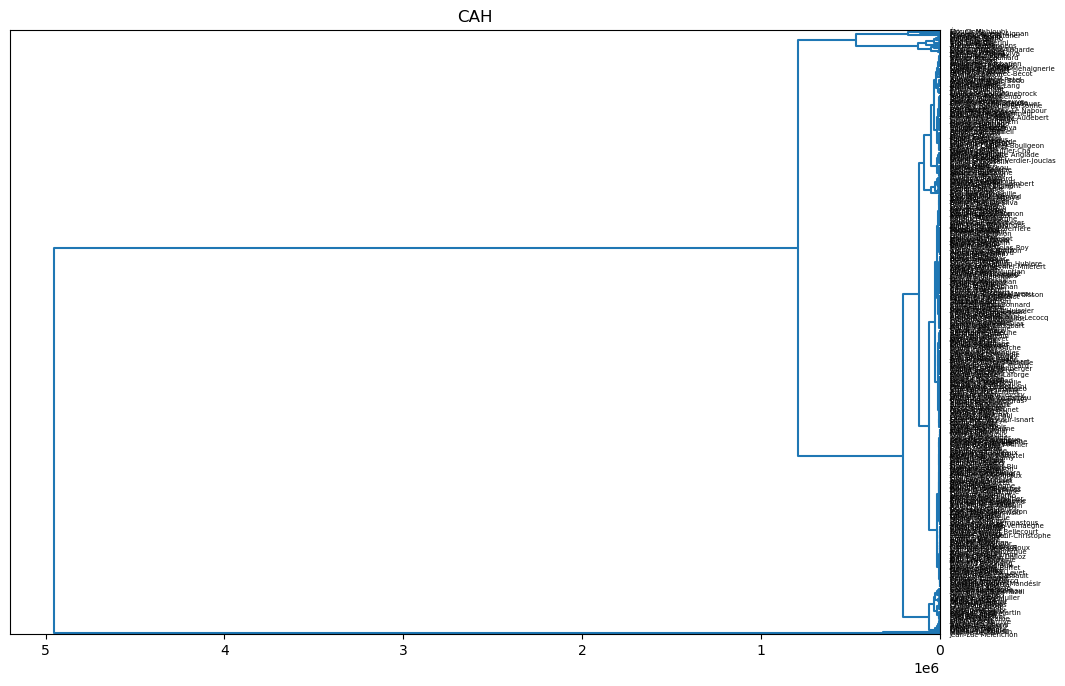

In [16]:
plt.figure(figsize=(12,8),dpi=100)
#générer la matrice des liens
Z = linkage(data_CAH,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(Z,labels=data_CAH.index,orientation='left',color_threshold=0)
plt.show()


In [17]:
#découpage à la hauteur t = 0.4
groupes_cah = fcluster(Z,t=0.4e6,criterion='distance')
#affichage des observations et leurs groupes
data_CAH['Groupe']=groupes_cah

In [18]:
data_CAH[data_CAH['Groupe']==1].index.to_list()

['Jean-Luc Mélenchon', 'Marine Le Pen']

In [19]:
data_CAH[data_CAH['Groupe']==2].index.to_list()

['Cédric Roussel',
 'Pascale Fontenel-Personne',
 'Guillaume Kasbarian',
 'Cyrille Isaac-Sibille',
 'Guillaume Vuilletet',
 'Pierre-Alain Raphan',
 'Emmanuelle Anthoine',
 'Anne-Christine Lang',
 'Laurence Vichnievsky',
 'Barbara Bessot Ballot',
 'Laurent Saint-Martin',
 'Carole Bureau-Bonnard',
 'Annaïg Le Meur',
 'Jean-Paul Lecoq',
 'Bertrand Sorre',
 'Bruno Duvergé',
 'Christian Hutin',
 'Alain Tourret',
 'Paul Molac',
 'Christophe Euzet',
 'Jean-Marc Zulesi',
 'Damien Abad',
 'Fabrice Le Vigoureux',
 'Bertrand Pancher',
 'Anne-Laure Cattelot',
 'Mohamed Laqhila',
 'Loïc Kervran',
 'François-Michel Lambert',
 'Valérie Oppelt',
 'Bruno Questel',
 'Géraldine Bannier',
 'Xavier Breton',
 'Caroline Abadie',
 'Pierre Vatin',
 'Claire Pitollat',
 'Meyer Habib',
 'Philippe Gosselin',
 'Sylvain Waserman',
 'Rodrigue Kokouendo',
 'Cécile Rilhac',
 'Marietta Karamanli',
 'Joël Aviragnet',
 'Vincent Descoeur',
 'Valérie Gomez-Bassac',
 'Christian Jacob',
 'Philippe Latombe',
 'Marie-Christine 

In [20]:
data_CAH[data_CAH['Groupe']==3].index.to_list()

['Olivier Faure',
 'Aurore Bergé',
 'Martine Wonner',
 'Stanislas Guerini',
 'Jean Lassalle',
 'Éric Woerth',
 'Jean-Christophe Lagarde',
 'Éric Coquerel',
 'Mathilde Panot',
 'Alexis Corbière',
 'Clémentine Autain',
 'Danièle Obono',
 'Adrien Quatennens',
 'Delphine Batho',
 'Cédric Villani',
 'Richard Ferrand']

In [21]:
data_CAH[data_CAH['Groupe']==4].index.to_list()

['Mounir Mahjoubi',
 'Éric Ciotti',
 'François Ruffin',
 'Nicolas Dupont-Aignan',
 'Christophe Castaner']